In [1]:
import numpy as np
from math import pi,sqrt
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('bmh')


class RandomWalk:

    max_iter = int(1e7)
    Nr_walks = int(1e5)

    def __init__(self,epsilon=1e-1,init_var=0.95e-4):#,N=1e5,max_iter=1e4):
        self.epsilon = epsilon
        self.var = init_var
        #self.k = 2*pi/(pi/self.var)**(1/4)
        self.Sc = (pi/self.var)**(1/4)
        self.k = 2*pi/self.Sc
        self.delta = np.random.normal(scale=sqrt(self.var))
        
        #self.N = N
        #self.max_iter = max_iter

    def reset(self,epsilon=1e-1,init_var=0.9e-4):
        self.__init__(epsilon=epsilon,init_var=init_var)

    def get_var(self):
        return np.pi/self.Sc**4

    def set_new_Sc(self):
        self.Sc -= self.epsilon

    def one_walk(self):

        self.reset()
        iter_nr = 0
        while self.Sc > 1.0 and iter_nr < self.max_iter:
            self.set_new_Sc()
            inter_var = self.get_var() - self.var
            self.delta += np.random.normal(scale=sqrt(inter_var))
            self.var = self.get_var()

        return self.delta

    def many_walks(self):
        deltas = np.zeros(self.Nr_walks)
        for i in tqdm(range(self.Nr_walks)):
            deltas[i] = self.one_walk()

        self.deltas = deltas
        
    


In [2]:
RW = RandomWalk()
RW.many_walks()

100%|██████████| 100000/100000 [00:32<00:00, 3055.82it/s]


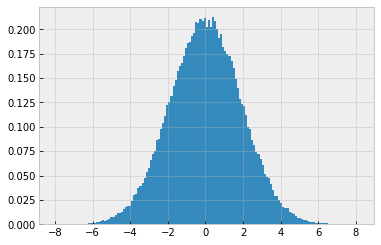

In [5]:
plt.hist(RW.deltas,bins='auto',density=True);